In [56]:
import matplotlib.pyplot as plt
import pydeck as pdk
import pandas as pd
import numpy as np
import pickle
import geopy

from dateutil import tz
from geopy.distance import geodesic

In [2]:
columns = ['mmsi', 'status', 'speed', 'lon', 'lat', 'course', 'heading', 'ts']

In [53]:
# import
location = [pd.read_csv('location1.csv'), pd.read_csv('location2.csv')]
location = pd.concat(location, ignore_index=True).reset_index(drop=True)
location.columns = columns
# shift
_lat, _lon = location['lat'].drop(location.shape[0]-1), location['lon'].drop(location.shape[0]-1)
location = location.drop(0).reset_index(drop=True)
location['_lat'], location['_lon'] = _lat, _lon
# displacement and direction (degrees ccw from north)
latlon = location.loc[:, ('_lat', '_lon', 'lat', 'lon')].copy()
location['displacement'] = latlon.apply(lambda x: geodesic(x[:2], x[2:]).meters, axis=1)
location['direction'] = latlon.apply(lambda x: np.rad2deg(np.arctan((x[3]-x[1])/(x[2]-x[0])))%360, axis=1)
# index
location.index = pd.to_datetime(location['ts'], format='%Y-%m-%d %H:%M:%S', utc=True).dt.tz_convert('Asia/Singapore')
location = location.drop(columns=['mmsi', 'status', 'ts'])

In [54]:
location

,speed,lon,lat,course,heading,_lat,_lon,displacement,direction
ts,,,,,,,,,
2020-04-01 08:34:03+08:00,0,103.6475,1.311192,219,310,1.311197,103.6474,11.142778,272.862405
2020-04-01 08:55:13+08:00,0,103.6475,1.311190,219,307,1.311192,103.6475,0.221150,0.000000
2020-04-01 09:19:04+08:00,0,103.6475,1.311198,0,307,1.311190,103.6475,0.884599,0.000000
2020-04-01 09:41:23+08:00,0,103.6475,1.311175,0,313,1.311198,103.6475,2.543222,0.000000
2020-04-01 10:02:14+08:00,0,103.6475,1.311190,0,313,1.311175,103.6475,1.658623,0.000000
...,...,...,...,...,...,...,...,...,...
2020-12-22 12:03:55+08:00,0,103.7467,1.297185,332,287,1.297200,103.7467,1.658623,0.000000
2020-12-22 12:11:28+08:00,9,103.7467,1.297100,190,3,1.297185,103.7467,9.398862,0.000000
2020-12-22 12:14:49+08:00,55,103.7471,1.296543,145,154,1.297100,103.7467,75.993863,324.316631


In [55]:
location.to_csv('location.csv')

In [57]:
with open('location.pkl', 'wb') as f:
    pickle.dump(location, f)

In [45]:
m = (103.6475 - 103.6474) / (1.311192 - 1.311197)

In [46]:
np.rad2deg(np.arctan(m)) % 360

272.8624052264417

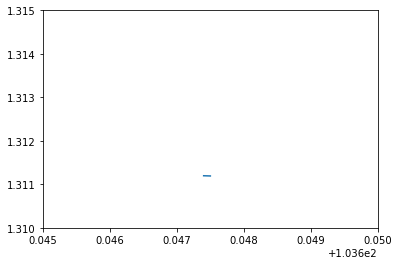

In [35]:
_0 = location.iloc[0][['_lon', 'lon', '_lat', 'lat']].to_numpy()
plt.xlim(103.645, 103.650)
plt.ylim(1.310, 1.315)
plt.plot(_0[:2], _0[2:])
# plt.scatter(*_0[1::2])